<a href="https://colab.research.google.com/github/PhuocPhat19146046/BTVN_AI_tuan14/blob/main/money_cnn_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import  SGD
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM, Flatten
import numpy as np
#from keras import kernel_initializer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)
data_train=datagen.flow_from_directory('../input/moneyvn/MONEY',
                                       target_size=(150,150),batch_size=5,
                                       class_mode='categorical',
                                       subset="training")
data_vali=datagen.flow_from_directory('../input/moneyvn/MONEY',
                                      target_size=(150,150),batch_size=5,
                                      class_mode='categorical',
                                      subset="validation")

Found 328 images belonging to 9 classes.
Found 51 images belonging to 9 classes.


In [ ]:
data_train.class_indices

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1)) 

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1)) 

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1)) 

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))
opt=SGD(learning_rate=0.0001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(data_train,epochs=25,batch_size=128,validation_data=data_vali,verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
model.save('money.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('../input/file-h5-cnn/money.h5')

2022-05-20 09:11:11.737185: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 27 images belonging to 1 classes.


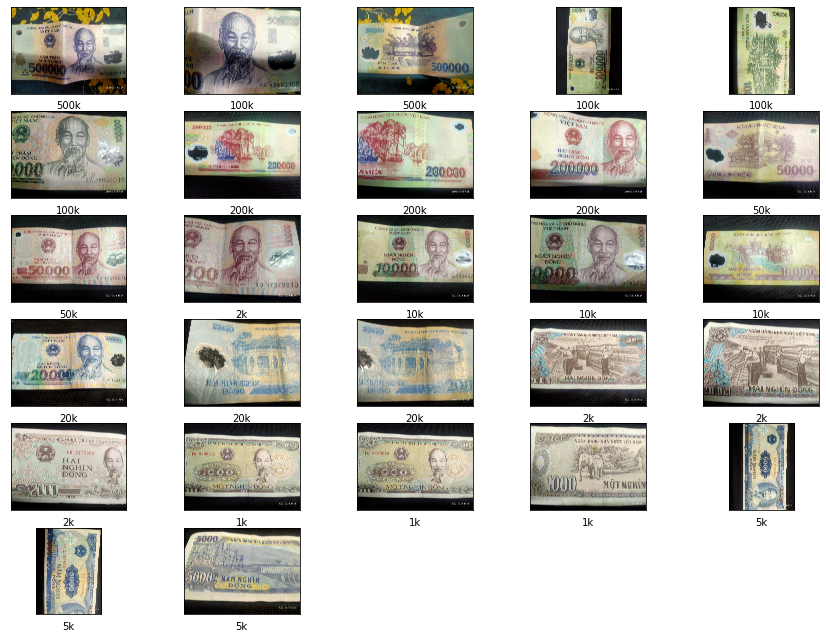

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('../input/money-test1',
                                          target_size=(150,150),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
fruit={0:'1k',
    1:'10k',
    2:'100k',
    3:'200',
    4:'2k',
    5:'20k',
    6:'200k',
    7:'500',
    8:'5k',
    9:'50k',
    10:'500k'}
plt.figure(figsize=(15,15))
for i in range(len(datagenerator.filenames)):
    plt.subplot(8,5,i+1)
    plt.imshow(load_img(datagenerator.filepaths[i]))
    plt.xticks([])
    plt.yticks([])
    img=load_img('../input/money-test1/'+datagenerator.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(fruit[np.argmax(model_1.predict(img))])
plt.show()